In [10]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg') 
plt.rcParams['figure.figsize'] = (9,6)

# Phasenraumfluss
Bewegungsgleichung für das mathematische Pendel:
\begin{align}\label{eqn:pendel}\tag{1}
  \ddot \phi(t) = - \sin \phi(t).
\end{align}
Wir führen eine Variable $v(t)$ für die erste Zeitableitung ein
\begin{align*}
  v(t) = \dot \phi(t).
\end{align*}
Dann ist (\ref{eqn:pendel}) äquivalent zu diesem System aus zwei gekoppelten DGL'en erster Ordnung
\begin{align}\tag{2}
  \dot \phi(t) &= v(t) \\
  \dot v(t) &= - \sin \phi(t). 
\end{align}

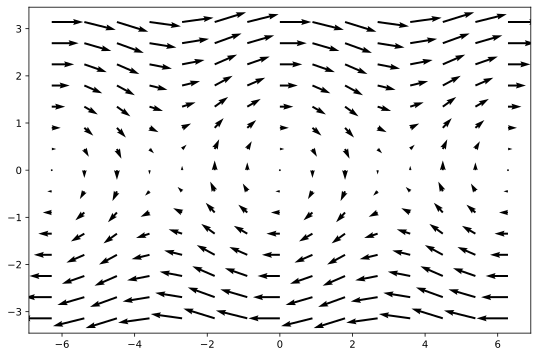

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Erzeuge das Richtungsvektorfeld, dass durch die rechte Seite von (2) gegeben ist.

# Definitionsbereich: Ein Gitter von 15 x 15 Punkten im Bereich
# -2 pi ... 2 pi (für phi),
# -  pi ...   pi (für v).

phi, v = np.meshgrid(np.linspace(-2*np.pi, 2*np.pi, 15), np.linspace(np.pi,-np.pi, 15))

# Berechne das Vektorfeld wie in Formel (2)

F_phi = v
F_v   = -np.sin(phi)

# Matplotlib kann Vektorfelder mit einem "Quiver-Plot" visualisieren

plt.quiver(phi,v,F_phi,F_v);

# Integration nach dem Euler-Verfahren

In [16]:
tau = .0001         # Schrittweite
N   = int(12/tau)   # Anzahl der Schritte

# Arrays für integrierte Funktionswerte
phis = np.zeros(N) 
vs   = np.zeros(N)

# Anfangsbedingungen
phis[0] = 0
vs[0]   = 1.9 

# Euler-Integration
for i in range(1,N):
    phis[i] = phis[i-1] + tau * vs[i-1]    
    vs[i]   = vs[i-1]   + tau * (-np.sin(phis[i-1]))

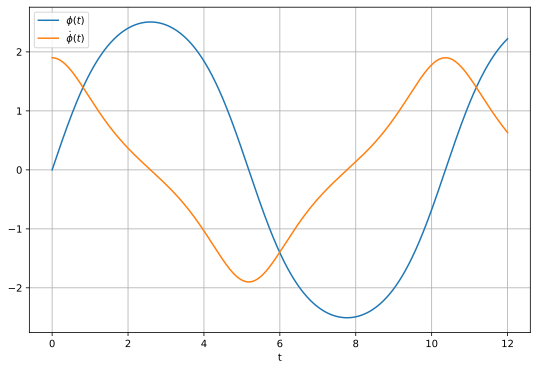

In [18]:
ts=np.array([t*tau for t in range(0,N)])

plt.plot(ts,phis,label='$\phi(t)$')
plt.plot(ts,vs,label='$\dot\phi(t)$')

plt.legend(loc='best')
plt.xlabel('t')
plt.grid()

In [ ]:
phi, v = np.meshgrid(np.linspace(-1*np.pi, 1*np.pi, 15), np.linspace(.8*np.pi,-.8*np.pi, 15))

F_phi = v
F_v   = -np.sin(phi)

plt.quiver(phi,v,F_phi,F_v);
plt.plot(phis,vs);

In [ ]:
# Pythons Matplotlib kann mit der streamplot-Funktion automatisch solche Flussidagramme erstellen

phi, v = np.meshgrid(np.linspace(-2*np.pi, 2*np.pi, 15), np.linspace(np.pi,-np.pi, 15))
F_phi = v
F_v   = -np.sin(phi)

plt.streamplot(phi,v,F_phi,F_v);

# Nehme noch das Potential hinzu
domain=np.linspace(-2*np.pi, 2*np.pi, 300) 
plt.plot(domain,1-np.cos(domain))

# Analytische Lösung

In [25]:
import scipy.special as spec

spec.ellipkinc(0,1/2)

0.0

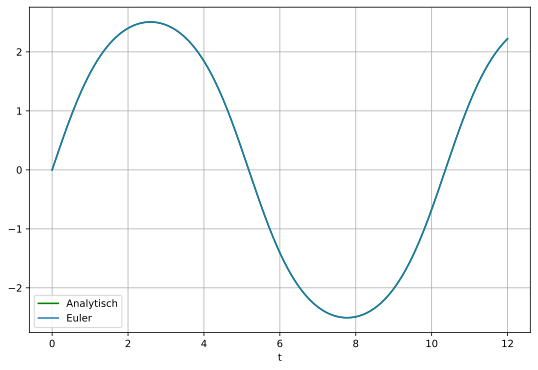

In [26]:
k=0.5*vs[0]

plt.plot(ts,[ 2*np.arcsin(k*spec.ellipj(t,k**2)[0]) for t in ts],'g',label='Analytisch')

plt.plot(ts,phis,label='Euler')

plt.legend(loc='best')
plt.xlabel('t')
plt.grid()